In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score, precision_recall_curve, roc_curve, auc, accuracy_score, mean_squared_error, recall_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split


Feel free to add or remove code/markdown cells as needed

Load the data below

In [2]:
titanic_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Final/titanic_cleaned.csv")
titanic_data.head()

,survived,sex,age,sibsp,parch,fare,embarked,pclass
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third


In [3]:
titanic_data = pd.get_dummies(titanic_data, columns = ["sex", "embarked", "pclass"], drop_first = True)
titanic_data = titanic_data.replace(True, 1)
titanic_data = titanic_data.replace(False, 0)
titanic_data.head()

/var/folders/j3/xhg265bj3gg399v4cr257t6w0000gn/T/ipykernel_99972/1624858610.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data = titanic_data.replace(False, 0)


,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Q26

In [4]:
x = titanic_data.drop("survived", axis = 1)
y = titanic_data["survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [5]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

baseline_model = LogisticRegression()

baseline_model.fit(x_train_scaled, y_train)

y_train_pred = baseline_model.predict(x_train_scaled)
y_test_pred = baseline_model.predict(x_test_scaled)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8033707865168539
0.8156424581005587


In [6]:
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

print(recall_train)
print(recall_test)

0.6923076923076923
0.7101449275362319


### Q27

In [7]:
baseline_coeffs = baseline_model.coef_[0]
predictors = x_train.columns.tolist()

coeff_dict = {predictors[i]: np.abs(baseline_coeffs[i]) for i in range(len(baseline_coeffs))}

coeff_dict = sorted(coeff_dict.items(), key=lambda x: x[1], reverse=True)
print(coeff_dict)

[('sex_male', np.float64(1.256816829082202)), ('pclass_Third', np.float64(1.0058995085241638)), ('age', np.float64(0.5498817066240338)), ('sibsp', np.float64(0.4117642173711103)), ('pclass_Second', np.float64(0.3498365318473064)), ('embarked_S', np.float64(0.14671040706402985)), ('fare', np.float64(0.09905806048603849)), ('parch', np.float64(0.04897574156369205)), ('embarked_Q', np.float64(0.0483704907184176))]


### Q28

In [8]:
titanic_data["is_alone"] = titanic_data.apply(lambda row: 1 if row["sibsp"] + row["parch"] == 0 else 0, axis = 1)
titanic_data.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third,is_alone
0,0,22.0,1,0,7.2500,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1


In [9]:
titanic_data["is_minor"] = titanic_data.apply(lambda row: 1 if row["age"] <= 16 else 0, axis = 1)
titanic_data.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third,is_alone,is_minor
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0


In [10]:
titanic_data["log_fare"] = np.log1p(titanic_data["fare"])
titanic_data.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third,is_alone,is_minor,log_fare
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,2.110213
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,4.280593
2,1,26.0,0,0,7.9250,0,0,1,0,1,1,0,2.188856
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,3.990834
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,2.202765


In [11]:
x_updated = titanic_data.drop(["survived", "fare"], axis = 1)
y_updated = titanic_data["survived"]

x_train_updated, x_test_updated, y_train_updated, y_test_updated = train_test_split(x_updated, y_updated, test_size = 0.2, random_state = 0)


In [12]:
scaler = StandardScaler()

x_train_updated_scaled = scaler.fit_transform(x_train_updated)
x_test_updated_scaled = scaler.transform(x_test_updated)

new_model = LogisticRegression()

new_model.fit(x_train_updated_scaled, y_train_updated)

y_test_updated_pred = new_model.predict(x_test_updated_scaled)

print(accuracy_score(y_test_updated, y_test_updated_pred))

recall_test_updated = recall_score(y_test_updated, y_test_updated_pred)

print(recall_test_updated)

0.8212290502793296
0.7391304347826086


In [13]:
recall_test_updated > recall_test

True

In [14]:
accuracy_score(y_test_updated, y_test_updated_pred) > accuracy_score(y_test, y_test_pred)

True

### Q29

In [15]:
# L1 regularization
l1_model = LogisticRegression(penalty = "l1", solver = "saga")

l1_model.fit(x_train_updated_scaled, y_train_updated)

y_test_updated_pred = l1_model.predict(x_test_updated_scaled)

print(accuracy_score(y_test_updated, y_test_updated_pred))

recall_test_updated = recall_score(y_test_updated, y_test_updated_pred)

print(recall_test_updated)

0.8100558659217877
0.7246376811594203


In [16]:
# L2 regularization
l2_model = LogisticRegression(penalty = "l2", solver = "saga")

l2_model.fit(x_train_updated_scaled, y_train_updated)

y_test_updated_pred = l2_model.predict(x_test_updated_scaled)

print(accuracy_score(y_test_updated, y_test_updated_pred))

recall_test_updated = recall_score(y_test_updated, y_test_updated_pred)

print(recall_test_updated)

0.8212290502793296
0.7391304347826086


In [17]:
# ElasticNet regularization
elastic_net_model = LogisticRegression(penalty = "elasticnet", solver = "saga", l1_ratio = 0.5)

elastic_net_model.fit(x_train_updated_scaled, y_train_updated)

y_test_updated_pred = elastic_net_model.predict(x_test_updated_scaled)

print(accuracy_score(y_test_updated, y_test_updated_pred))

recall_test_updated = recall_score(y_test_updated, y_test_updated_pred)

print(recall_test_updated)

0.8156424581005587
0.7246376811594203


### Q31 

In [18]:
from sklearn.model_selection import TunedThresholdClassifierCV

tuned_clf = TunedThresholdClassifierCV(
    estimator= l2_model,
    scoring="f1"  
)

tuned_clf.fit(x_train_updated_scaled, y_train_updated)

print(f"Best threshold: {tuned_clf.best_threshold_:.2f}")

Best threshold: 0.53


### Q32

In [19]:
print(f"Best F1-score: {tuned_clf.best_score_:.4f}")

Best F1-score: 0.7415


## Bonus question

In [20]:
tuned_clf_bonus = TunedThresholdClassifierCV(
    estimator= l2_model,
    scoring="accuracy"  
)

tuned_clf_bonus.fit(x_train_updated_scaled, y_train_updated)

print(f"Best threshold: {tuned_clf_bonus.best_threshold_:.2f}")
print(f"Best accuracy: {tuned_clf_bonus.best_score_:.4f}")

Best threshold: 0.53
Best accuracy: 0.8152


In [21]:
titanic_data.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third,is_alone,is_minor,log_fare
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,2.110213
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,4.280593
2,1,26.0,0,0,7.9250,0,0,1,0,1,1,0,2.188856
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,3.990834
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,2.202765


In [22]:
# from domain knowledge, i know that third class men were given lowest priority for lifeboats -- create the relevant interaction

titanic_data["third_class_men"] = (titanic_data["pclass_Third"] * titanic_data["sex_male"])

titanic_data.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third,is_alone,is_minor,log_fare,third_class_men
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,2.110213,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,4.280593,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,1,0,2.188856,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,3.990834,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,2.202765,1


In [23]:
# similarly, add interaction term for second class men and third class women

titanic_data["second_class_men"] = (titanic_data["pclass_Second"] * titanic_data["sex_male"])

titanic_data["third_class_women"] = (titanic_data["pclass_Third"] * (1 - titanic_data["sex_male"]))

titanic_data.head()


,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_Second,pclass_Third,is_alone,is_minor,log_fare,third_class_men,second_class_men,third_class_women
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,2.110213,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,4.280593,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,1,0,2.188856,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,3.990834,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,2.202765,1,0,0


In [24]:
# the location of embarking seems irrelevant to survival, drop them

titanic_data = titanic_data.drop(["embarked_Q", "embarked_S"], axis = 1)

titanic_data.head()

,survived,age,sibsp,parch,fare,sex_male,pclass_Second,pclass_Third,is_alone,is_minor,log_fare,third_class_men,second_class_men,third_class_women
0,0,22.0,1,0,7.2500,1,0,1,0,0,2.110213,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,4.280593,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,2.188856,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,3.990834,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,1,0,2.202765,1,0,0


<Axes: xlabel='age', ylabel='survived'>

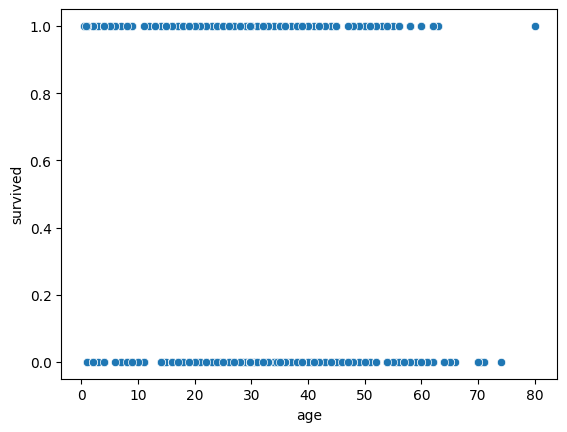

In [25]:
# age against survival scatter plot

sns.scatterplot(x = "age", y = "survived", data = titanic_data)

In [26]:
# since age seems to not be a good predictor, drop it

titanic_data = titanic_data.drop(["age"], axis = 1)

titanic_data.head()

,survived,sibsp,parch,fare,sex_male,pclass_Second,pclass_Third,is_alone,is_minor,log_fare,third_class_men,second_class_men,third_class_women
0,0,1,0,7.2500,1,0,1,0,0,2.110213,1,0,0
1,1,1,0,71.2833,0,0,0,0,0,4.280593,0,0,0
2,1,0,0,7.9250,0,0,1,1,0,2.188856,0,0,1
3,1,1,0,53.1000,0,0,0,0,0,3.990834,0,0,0
4,0,0,0,8.0500,1,0,1,1,0,2.202765,1,0,0


In [27]:
x_bonus = titanic_data.drop(["survived", "fare"], axis = 1)
y_bonus = titanic_data["survived"]

x_train_bonus, x_test_bonus, y_train_bonus, y_test_bonus = train_test_split(x_bonus, y_bonus, test_size = 0.2, random_state = 0)

x_train_bonus_scaled = StandardScaler().fit_transform(x_train_bonus)
x_test_bonus_scaled = StandardScaler().fit_transform(x_test_bonus)

bonus_model = LogisticRegression(penalty= "elasticnet", solver = "saga", l1_ratio = .5)

bonus_model.fit(x_train_bonus_scaled, y_train_bonus)

y_train_bonus_pred = bonus_model.predict(x_train_bonus_scaled)
y_test_bonus_pred = bonus_model.predict(x_test_bonus_scaled)

print(accuracy_score(y_train_bonus, y_train_bonus_pred))
print(accuracy_score(y_test_bonus, y_test_bonus_pred))

0.8146067415730337
0.8268156424581006
